# Bayesian multi-armed bandits

## Import libraries and modules 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from arm.Bernoulli import Bernoulli
from arm.Gaussian import Gaussian

from algorithm.UCB import UCB
from algorithm.Greedy import Greedy

from environment.MAB import MAB
from environment.BayesMAB import EvaluationBayesMAB

## Experimental setup

In [3]:
np.random.seed(1234)

nb_rep = 100
scenario = 1

if scenario == 0:
    # Bernoulli bandit problem with U([0, 1]) prior on mean rewards
    K = 64
    horizon = 1000
    envs = []
    for _ in range(nb_rep):
        means = np.random.beta(1, 1, K)
        envs += [MAB([Bernoulli(p) for p in means])]
elif scenario == 1:
    # Gaussian bandit problem with U([0, 1]) prior on mean rewards
    K = 64
    horizon = 1000
    envs = []
    for _ in range(nb_rep):
        means = np.random.beta(1, 1, K)
        envs += [MAB([Gaussian(p) for p in means])]

## Evaluate various bandit algorithms

In [4]:
algorithms = [UCB(K),
              Greedy(K)]

Start evaluation of UCB
0
10
20
30
40
50
60
70
80
90
Bayesian regret of UCB : 333.4560272914799 +- 33.33088765000985 

Start evaluation of Greedy
0
10
20
30
40
50
60
70
80
90
Bayesian regret of Greedy : 125.64973654668927 +- 57.68918036762294 



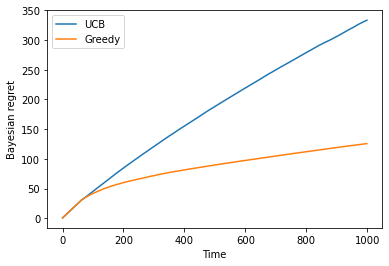

In [5]:
plt.figure()

for algo in algorithms:
    print('Start evaluation of', algo.__class__.__name__)
    ev = EvaluationBayesMAB(envs, algo, horizon)
    mean_regret = ev.mean_regret()
    std_regret = ev.std_regret()
    print('Bayesian regret of', algo.__class__.__name__, ':', mean_regret[-1], '+-', std_regret[-1], '\n')
    
    
    plt.plot(ev.tsav, mean_regret)
    #plt.fill_between(ev.tsav, mean_regret-std_regret, mean_regret+std_regret, alpha=.2)
    plt.xlabel('Time')
    plt.ylabel('Bayesian regret')

plt.legend([algo.__class__.__name__ for algo in algorithms], loc=0)
plt.show()